In [1]:
import theano
import pymc3 as pm
import sklearn
import numpy as np
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('white')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_moons

floatX=theano.config.floatX

In [2]:
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X = X.astype(floatX)
Y = Y.astype(floatX)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

## Making a toy dataset for binary classification

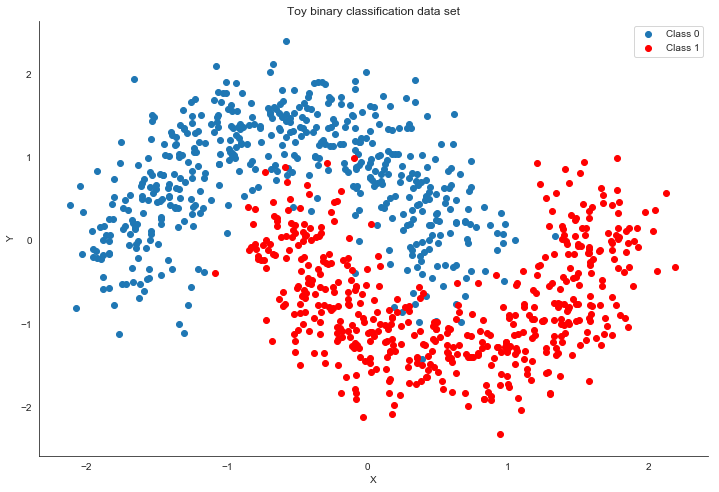

In [3]:

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
sns.despine(); ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

## Constructing neural networks for classification
###  Network with single hidden layer
<b>1st hidden layer:</b><br>
No of neurons: 5 <br>
Activations: $tanh$ <br>
Weights initialization: $w_i \sim N(0,1)$ 

In [4]:
def construct_nn_1(ann_input, ann_output):
    n_hidden = 5
    
    # Initialize random weights between each layer
    init_1 = np.random.randn(X.shape[1], n_hidden).astype(floatX)
    init_out = np.random.randn(n_hidden).astype(floatX)
        
    with pm.Model() as neural_network:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1, 
                                 shape=(X.shape[1], n_hidden), 
                                 testval=init_1)
        
        # Weights from hidden layer to output
        weights_2_out = pm.Normal('w_2_out', 0, sd=1, 
                                  shape=(n_hidden,), 
                                  testval=init_out)
        
        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, 
                                         weights_in_1))

        act_out = pm.math.sigmoid(pm.math.dot(act_1, 
                                              weights_2_out))
        
        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli('out', 
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network

###  Network with two hidden layers
<b>1st hidden layer:</b> <br>
No of neurons: 5 <br>
Activations: $tanh$ <br>
Weights initialization: $w_i \sim N(0,1)$ <br>
<b>2nd hidden layer:</b> <br>
No of neurons: 5 <br>
Activations: $tanh$ <br>
Weights initialization: $w_i \sim N(0,1)$ ?

In [5]:
def construct_nn_2(ann_input, ann_output):
    n_hidden = 5
    
    # Initialize random weights between each layer
    init_1 = np.random.randn(X.shape[1], n_hidden).astype(floatX)
    init_2 = np.random.randn(n_hidden, n_hidden).astype(floatX)
    init_out = np.random.randn(n_hidden).astype(floatX)
        
    with pm.Model() as neural_network:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1, 
                                 shape=(X.shape[1], n_hidden), 
                                 testval=init_1)
        
        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_2)
        
        # Weights from hidden layer to output
        weights_2_out = pm.Normal('w_2_out', 0, sd=1, 
                                  shape=(n_hidden,), 
                                  testval=init_out)
        
        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, 
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, 
                                         weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2, 
                                              weights_2_out))
        
        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli('out', 
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network

###  Network with three hidden layers
<b>1st hidden layer:</b> <br>
No of neurons: 5 <br>
Activations: $tanh$ <br>
Weights initialization: $w_i \sim N(0,1)$ <br>
<b>2nd hidden layer:</b> <br>
No of neurons: 5 <br>
Activations: $tanh$ <br>
Weights initialization: $w_i \sim N(0,1)$ <br>
<b>3rd hidden layer:</b> <br>
No of neurons: 5 <br>
Activations: $tanh$ <br>
Weights initialization: $w_i \sim N(0,1)$

In [6]:
def construct_nn_3(ann_input, ann_output):
    n_hidden = 5
    
    # Initialize random weights between each layer
    init_1 = np.random.randn(X.shape[1], n_hidden).astype(floatX)
    init_2 = np.random.randn(n_hidden, n_hidden).astype(floatX)
    init_3 = np.random.randn(n_hidden, n_hidden).astype(floatX)
    init_out = np.random.randn(n_hidden).astype(floatX)
        
    with pm.Model() as neural_network:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1, 
                                 shape=(X.shape[1], n_hidden), 
                                 testval=init_1)
        
        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_2)
        
        # Weights from 2nd to 3rd layer
        weights_2_3 = pm.Normal('w_2_3', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_3)
        
        # Weights from hidden layer to output
        weights_3_out = pm.Normal('w_3_out', 0, sd=1, 
                                  shape=(n_hidden,), 
                                  testval=init_out)
        
        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, 
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, 
                                         weights_1_2))
        act_3 = pm.math.tanh(pm.math.dot(act_2, 
                                         weights_2_3))
        act_out = pm.math.sigmoid(pm.math.dot(act_3, 
                                              weights_3_out))
        
        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli('out', 
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network


###  Network with four hidden layers
<b>1st hidden layer:</b> <br>
No of neurons: 5 <br>
Activations: $tanh$ <br>
Weights initialization: $w_i \sim N(0,1)$ <br>
<b>2nd hidden layer:</b> <br>
No of neurons: 5 <br>
Activations: $tanh$ <br>
Weights initialization: $w_i \sim N(0,1)$ <br>
<b>3rd hidden layer:</b> <br>
No of neurons: 5 <br>
Activations: $tanh$ <br>
Weights initialization: $w_i \sim N(0,1)$ <br>
<b>4th hidden layer:</b> <br>
No of neurons: 5 <br>
Activations: $tanh$ <br>
Weights initialization: $w_i \sim N(0,1)$

In [7]:
def construct_nn_4(ann_input, ann_output):
    n_hidden = 5
    
    # Initialize random weights between each layer
    init_1 = np.random.randn(X.shape[1], n_hidden).astype(floatX)
    init_2 = np.random.randn(n_hidden, n_hidden).astype(floatX)
    init_3 = np.random.randn(n_hidden, n_hidden).astype(floatX)
    init_4 = np.random.randn(n_hidden, n_hidden).astype(floatX)
    init_out = np.random.randn(n_hidden).astype(floatX)
        
    with pm.Model() as neural_network:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1, 
                                 shape=(X.shape[1], n_hidden), 
                                 testval=init_1)
        
        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_2)
        
        # Weights from 2nd to 3rd layer
        weights_2_3 = pm.Normal('w_2_3', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_3)
        
        # Weights from 2nd to 3rd layer
        weights_3_4 = pm.Normal('w_3_4', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_4)
        
        # Weights from hidden layer to output
        weights_4_out = pm.Normal('w_4_out', 0, sd=1, 
                                  shape=(n_hidden,), 
                                  testval=init_out)
        
        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, 
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, 
                                         weights_1_2))
        act_3 = pm.math.tanh(pm.math.dot(act_2, 
                                         weights_2_3))
        act_4 = pm.math.tanh(pm.math.dot(act_3, 
                                         weights_3_4))
        act_out = pm.math.sigmoid(pm.math.dot(act_4, 
                                              weights_4_out))
        
        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli('out', 
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network


In [8]:
ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)
neural_network_1 = construct_nn_1(ann_input, ann_output)
neural_network_2 = construct_nn_2(ann_input, ann_output) 
neural_network_3 = construct_nn_3(ann_input, ann_output)
neural_network_4 = construct_nn_4(ann_input, ann_output)

In [9]:
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))

## We use ADVI variational inference algorithm instead of MCMC sampling

In [10]:
with neural_network_1:
    inference = pm.ADVI()
    approx1 = pm.fit(n=50000, method=inference)

with neural_network_2:
    inference = pm.ADVI()
    approx2 = pm.fit(n=200000, method=inference)

with neural_network_3:
    inference = pm.ADVI()
    approx3 = pm.fit(n=500000, method=inference)
    
with neural_network_4:
    inference = pm.ADVI()
    approx4 = pm.fit(n=1000000, method=inference)

trace_1 = approx1.sample(draws = 5000)
trace_2 = approx2.sample(draws = 5000)
trace_3 = approx3.sample(draws = 5000)
trace_4 = approx4.sample(draws = 5000)

ann_input.set_value(X_test)
ann_output.set_value(Y_test)

Average Loss = 123.12: 100%|██████████| 50000/50000 [00:30<00:00, 1629.55it/s]
Finished [100%]: Average Loss = 123.13
Average Loss = 111.07: 100%|██████████| 200000/200000 [02:00<00:00, 1665.19it/s]
Finished [100%]: Average Loss = 111.1
Average Loss = 117.94: 100%|██████████| 500000/500000 [05:30<00:00, 1511.05it/s]
Finished [100%]: Average Loss = 117.85
Average Loss = 128.28: 100%|██████████| 1000000/1000000 [12:27<00:00, 1338.53it/s]
Finished [100%]: Average Loss = 128.25


In [11]:
with neural_network_1:
    ppc1 = pm.sample_ppc(trace_1, samples=5000, progressbar=False)

pred1 = ppc1['out'].mean(axis=0) > 0.5

print(f'Accuracy for 1st network= {(Y_test == pred1).mean() * 100}%')

with neural_network_2:
    ppc2 = pm.sample_ppc(trace_2, samples=5000, progressbar=False)

pred2 = ppc2['out'].mean(axis=0) > 0.5

print(f'Accuracy for 2nd network= {(Y_test == pred2).mean() * 100}%')

with neural_network_3:
    ppc3 = pm.sample_ppc(trace_3, samples=5000, progressbar=False)

pred3 = ppc3['out'].mean(axis=0) > 0.5

print(f'Accuracy for 3rd network= {(Y_test == pred3).mean() * 100}%')

with neural_network_4:
    ppc4 = pm.sample_ppc(trace_4, samples=5000, progressbar=False)

pred4 = ppc4['out'].mean(axis=0) > 0.5

print(f'Accuracy for 4th network= {(Y_test == pred4).mean() * 100}%')

Accuracy for 1st network= 92.4%
Accuracy for 2nd network= 94.6%
Accuracy for 3rd network= 95.39999999999999%
Accuracy for 4th network= 95.39999999999999%


In [12]:
waic_1 = pm.waic(trace_1, neural_network_1)
loo_1 = pm.loo(trace_1, neural_network_1)

print(f"WAIC for 1st network: {waic_1.WAIC}")
print(f"LOO for 1st network: {loo_1.LOO}")

waic_2 = pm.waic(trace_2, neural_network_2)
loo_2 = pm.loo(trace_2, neural_network_2)

print(f"WAIC for 2nd network: {waic_2.WAIC}")
print(f"LOO for 2nd network: {loo_2.LOO}")

waic_3 = pm.waic(trace_3, neural_network_3)
loo_3 = pm.loo(trace_3, neural_network_3)

print(f"WAIC for 3rd network: {waic_3.WAIC}")
print(f"LOO for 3rd network: {loo_3.LOO}")

waic_4 = pm.waic(trace_4, neural_network_4)
loo_4 = pm.loo(trace_4, neural_network_4)

print(f"WAIC for 4th network: {waic_4.WAIC}")
print(f"LOO for 4th network: {loo_4.LOO}")

WAIC for 1st network: 214.0056920340595
LOO for 1st network: 214.25256636830935
WAIC for 2nd network: 190.6380541929961
LOO for 2nd network: 191.50476039750362
WAIC for 3rd network: 223.1027468692383
LOO for 3rd network: 226.83325424104206
WAIC for 4th network: 256.4663885601975
LOO for 4th network: 262.65043816165934


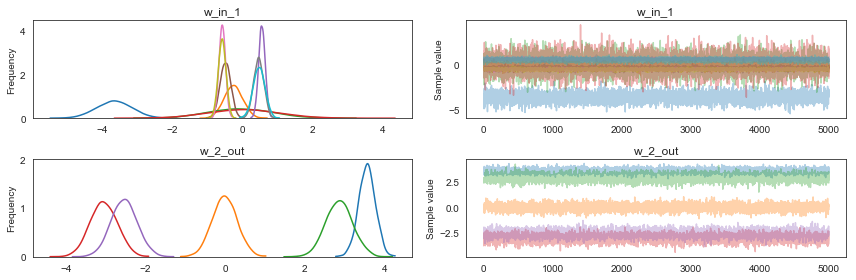

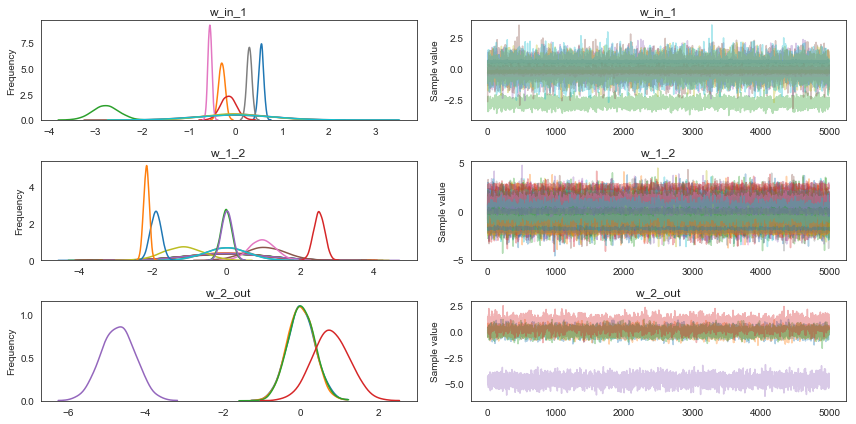

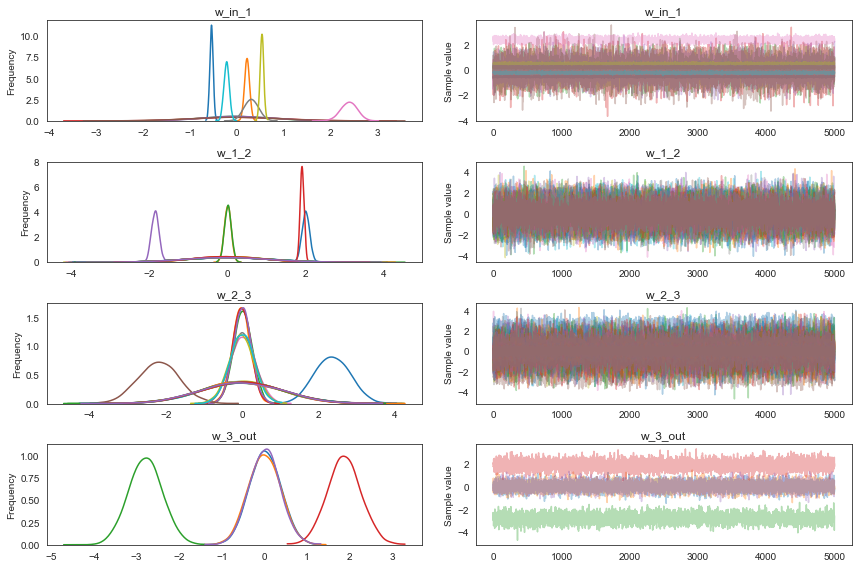

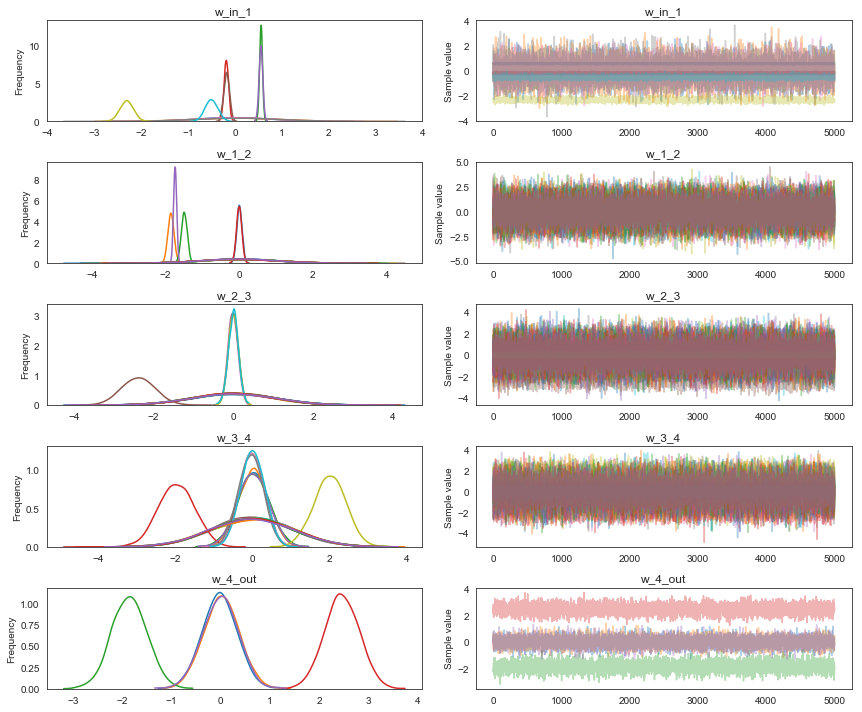

In [13]:
pm.traceplot(trace_1);
pm.traceplot(trace_2);
pm.traceplot(trace_3);
pm.traceplot(trace_4);